準備

In [3]:
import warnings
warnings.simplefilter("ignore")
%pylab inline --no-import-all

Populating the interactive namespace from numpy and matplotlib


Scipyでの行列演算

In [3]:
from scipy import *

In [4]:
a = [[1, 3, 5], [2, 5, 1], [2, 3, 8]] # リスト
A = mat(a) # リスト→行列
A.tolist() # 行列→リスト

[[1, 3, 5], [2, 5, 1], [2, 3, 8]]

In [5]:
A

matrix([[1, 3, 5],
        [2, 5, 1],
        [2, 3, 8]])

In [6]:
A.I # 逆行列

matrix([[-1.48,  0.36,  0.88],
        [ 0.56,  0.08, -0.36],
        [ 0.16, -0.12,  0.04]])

In [7]:
A.H # エルミート行列

matrix([[1, 2, 2],
        [3, 5, 3],
        [5, 1, 8]])

In [8]:
A.T # 転置行列

matrix([[1, 2, 2],
        [3, 5, 3],
        [5, 1, 8]])

In [9]:
A.A # 行列→配列

array([[1, 3, 5],
       [2, 5, 1],
       [2, 3, 8]])

In [10]:
A.A1 # 行列→1次元配列

array([1, 3, 5, 2, 5, 1, 2, 3, 8])

In [11]:
A[1] # 2番目の行を取り出す

matrix([[2, 5, 1]])

In [12]:
A.T[1] # 2番目の列を取り出す

matrix([[3, 5, 3]])

In [13]:
A.conj() # 共役行列

matrix([[1, 3, 5],
        [2, 5, 1],
        [2, 3, 8]])

In [14]:
A.diagonal() # 対角化

matrix([[1, 5, 8]])

In [15]:
from scipy import linalg
linalg.det(A) # 行列式

-25.000000000000004

In [16]:
linalg.eig(A) # 固有値と固有ベクトル

(array([ 10.55404560+0.j,  -0.58730640+0.j,   4.03326081+0.j]),
 array([[-0.51686204, -0.94195144,  0.11527992],
        [-0.32845853,  0.31778071, -0.81936883],
        [-0.79054957,  0.10836468,  0.56155611]]))

In [22]:
linalg.norm(A) # 正規化

11.916375287812984

In [23]:
linalg.qr(A) # QR分解

(array([[-0.33333333, -0.52297636, -0.78446454],
        [-0.66666667, -0.45760432,  0.58834841],
        [-0.66666667,  0.7190925 , -0.19611614]]),
 array([[-3.        , -6.33333333, -7.66666667],
        [ 0.        , -1.69967317,  2.68025385],
        [ 0.        ,  0.        , -4.90290338]]))

In [24]:
from scipy.linalg import lu
lu(A) # LU分解

(array([[ 0.,  0.,  1.],
        [ 1.,  0.,  0.],
        [ 0.,  1.,  0.]]), array([[ 1.  ,  0.  ,  0.  ],
        [ 1.  ,  1.  ,  0.  ],
        [ 0.5 , -0.25,  1.  ]]), array([[ 2.  ,  5.  ,  1.  ],
        [ 0.  , -2.  ,  7.  ],
        [ 0.  ,  0.  ,  6.25]]))

In [25]:
A + A # 和

matrix([[ 2,  6, 10],
        [ 4, 10,  2],
        [ 4,  6, 16]])

In [26]:
A - A # 差

matrix([[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]])

In [27]:
A * A # 積

matrix([[17, 33, 48],
        [14, 34, 23],
        [24, 45, 77]])

In [28]:
A / A # 商

matrix([[ 1.,  1.,  1.],
        [ 1.,  1.,  1.],
        [ 1.,  1.,  1.]])

SymPyでの数式表示

In [29]:
from sympy import *

In [30]:
Matrix(A * A.I)

Matrix([
[                 1.0, -1.11022302462516e-16, -5.55111512312578e-17],
[3.05311331771918e-16,                   1.0,  1.87350135405495e-16],
[2.22044604925031e-16, -1.11022302462516e-16,                   1.0]])

In [31]:
# 文字式
x = Symbol('x')
y = Symbol('y')
A = Matrix([[1,x], [y,1]])
A

Matrix([
[1, x],
[y, 1]])

In [32]:
A * 2

Matrix([
[  2, 2*x],
[2*y,   2]])

## 疎行列,Sparseマトリクス

In [33]:
from scipy import sparse
#X:13503行 102列
#Y:13503行 4518列
#sparse.diag()
#X.T * Y

$y = \sum_i x_i y_j$

In [34]:
from sympy import init_printing ;
init_printing()

In [35]:
import sympy
from sympy import var,Eq
var('a:z')#普通の小文字のaからzは全てsympyのシンボル（変数）として扱うことにしました。
eq1 = Eq(a*x**2 + b*x + c, 0)
print(eq1); eq1

a*x**2 + b*x + c == 0


In [36]:
eq2=eq1.subs({a:1,b:0,c:1})# 各係数に値を代入。
from sympy import solve
ans=solve(eq2)
print(ans); ans

[-I, I]


Integral(atan((2*x + 1)**2/(4*x + 12)**2), (x, -10.0, pi))
atan((2*x + 1)**2/(4*x + 12)**2)


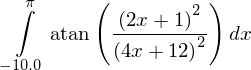

In [37]:
from sympy import atan, pi
y=2*x+1
exp0=atan(y**2/(2*y+10)**2)
exp1=sympy.integrals.Integral(exp0,(x,-10.0,pi))
print(exp1)
print(exp0)
exp1

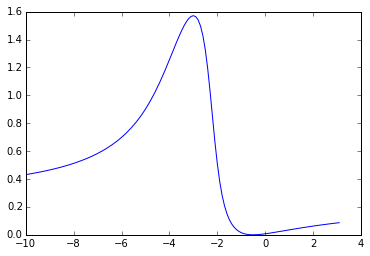

In [38]:
import numpy as np
import matplotlib.pyplot as plt
def exp0_func(x):
    from numpy import arctan             # numpyではarctan, sympyではatan
    return arctan((2*x + 1)**2/(4*x + 12)**2)

_x=np.arange(-10.0,np.pi,0.1)
plt.plot(_x,exp0_func(_x))

In [39]:
from scipy import integrate
integrate.quad(exp0_func,-10.0,np.pi)

In [40]:
exp1.evalf()

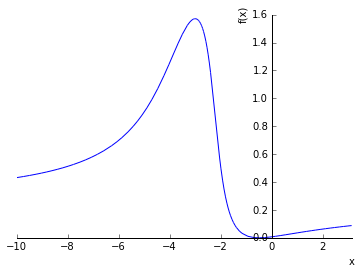

In [41]:
from sympy.plotting import plot
plot(exp0,(x,-10.0,pi))

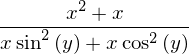

In [42]:
from sympy import simplify, cos, sin
from sympy.abc import x, y
a = (x + x**2)/(x*sin(y)**2 + x*cos(y)**2)
a

In [43]:
simplify(a)

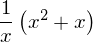

In [44]:
from sympy import trigsimp, cancel
b = trigsimp(a)
b

In [45]:
c = cancel(b)
c

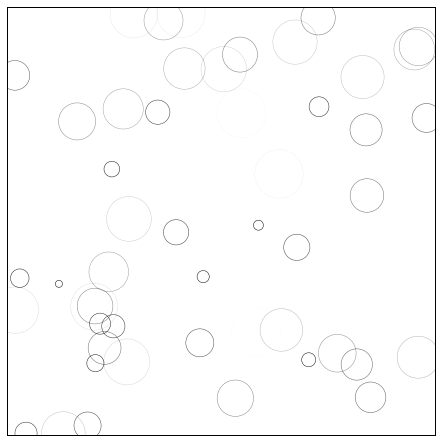

In [4]:
import numpy as np
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# No toolbar
matplotlib.rcParams['toolbar'] = 'None'

# New figure with white background
fig = plt.figure(figsize=(6,6), facecolor='white')

# New axis over the whole figureand a 1:1 aspect ratio
# ax = fig.add_axes([0,0,1,1], frameon=False, aspect=1)
ax = fig.add_axes([0.005,0.005,0.990,0.990], frameon=True, aspect=1)

# Number of ring
n = 50
size_min = 50
size_max = 50*50
          
# Ring position 
P = np.random.uniform(0,1,(n,2))

# Ring colors
C = np.ones((n,4)) * (0,0,0,1)

# Alpha color channel goes from 0 (transparent) to 1 (opaque)
C[:,3] = np.linspace(0,1,n)

# Ring sizes
S = np.linspace(size_min, size_max, n)

# Scatter plot
scat = ax.scatter(P[:,0], P[:,1], s=S, lw = 0.5,
                  edgecolors = C, facecolors='None')

# Ensure limits are [0,1] and remove ticks
ax.set_xlim(0,1), ax.set_xticks([])
ax.set_ylim(0,1), ax.set_yticks([])


def update(frame):
    global P, C, S

    # Every ring is made more transparent
    C[:,3] = np.maximum(0, C[:,3] - 1.0/n)

    # Each ring is made larger
    S += (size_max - size_min) / n

    # Reset ring specific ring (relative to frame number)
    i = frame % 50
    P[i] = np.random.uniform(0,1,2)
    S[i] = size_min
    C[i,3] = 1

    # Update scatter object
    scat.set_edgecolors(C)
    scat.set_sizes(S)
    scat.set_offsets(P)
    return scat,

animation = FuncAnimation(fig, update, interval=10)
animation.save('rain.gif', writer='imagemagick', fps=30, dpi=72)
plt.show()

![image](rain.gif)

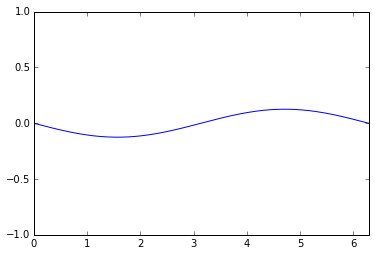

In [3]:
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
import matplotlib.animation
import numpy as np

def init_animation():
    global line
    line, = ax.plot(x, np.zeros_like(x))
    ax.set_xlim(0, 2*np.pi)
    ax.set_ylim(-1,1)

def animate(i):
    line.set_ydata(np.sin(2*np.pi*i / 50)*np.sin(x))
    return line,

fig = plt.figure()
ax = fig.add_subplot(111)
x = np.linspace(0, 2*np.pi, 200)

ani = matplotlib.animation.FuncAnimation(fig, animate, init_func=init_animation, frames=50)
ani.save('animation.gif', writer='imagemagick', fps=30)

![image](animation.gif)

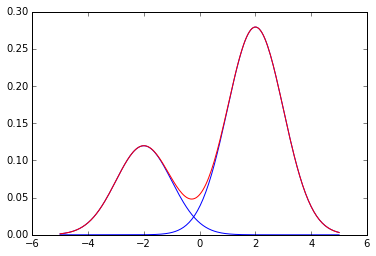

In [15]:
import matplotlib.mlab as mlab
import numpy as np
import scipy.stats

x = np.linspace(-5, 5, 200)
pi_k = np.array([0.3, 0.7])
#norm1 = mlab.normpdf(x, -1, 1)
norm1 = scipy.stats.norm.pdf(x, loc=-1, scale=1)
#norm2 = mlab.normpdf(x, 2, 1)
norm1 = scipy.stats.norm.pdf(x, loc=-2, scale=1)

plt.plot(x, pi_k[0]*norm1, color="blue")
plt.plot(x, pi_k[1]*norm2, color="blue")
plt.plot(x, pi_k[0]*norm1+pi_k[1]*norm2, color="red")
plt.show()

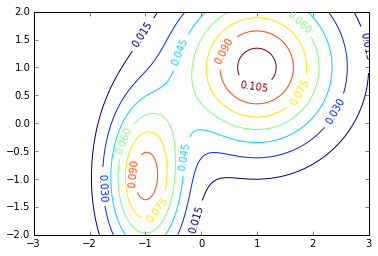

In [20]:
import matplotlib.mlab as mlab
import numpy as np
import scipy.stats

pi_k = np.array([0.3, 0.7])
x = np.linspace(-3.0, 3.0, 200)
y = np.linspace(-2.0, 2.0, 200)
X, Y = np.meshgrid(x, y)
Z1 = mlab.bivariate_normal(X, Y, 0.5, 1.0, -1, -1)
Z2 = mlab.bivariate_normal(X, Y, 1.0, 1.0, 1, 1)
Z = pi_k[0]*Z1 + pi_k[1]*Z2

CS = plt.contour(X, Y, Z)
plt.clabel(CS, inline=1, fontsize=10)
plt.show()

In [ ]:
import matplotlib.mlab as mlab
import numpy as np
import scipy.stats

pi_k = np.array([0.3, 0.7])
x = np.linspace(-3.0, 3.0, 200)
y = np.linspace(-2.0, 2.0, 200)
X, Y = np.meshgrid(x, y)
#Z1 = mlab.bivariate_normal(X, Y, 0.5, 1.0, -1, -1)
rv1 = scipy.stats.multivariate_normal.pdf([0.5, 1.0], [[1.0, 0], [0, -1.0]])
Z1 = rv1.pdf(X, Y)
Z2 = mlab.bivariate_normal(X, Y, 1.0, 1.0, 1, 1)
Z = pi_k[0]*Z1 + pi_k[1]*Z2

CS = plt.contour(X, Y, Z)
plt.clabel(CS, inline=1, fontsize=10)
plt.show()

In [1]:
a = 3
b = 2
print(a-b)

1
